In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load Dataset
data=pd.read_csv('./seeds.csv')
data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
data.columns=['Area', 'Perimeter', 'Compactness', 'Kernel_Length','Kernel_Width', 'Asymmetry_Coeff','Kernel_Groove' , 'Type']
data.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
data.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel_Length      0
Kernel_Width       0
Asymmetry_Coeff    0
Kernel_Groove      0
Type               0
dtype: int64

In [5]:
data.Type.value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

In [6]:
#Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel_Length    199 non-null    float64
 4   Kernel_Width     199 non-null    float64
 5   Asymmetry_Coeff  199 non-null    float64
 6   Kernel_Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [7]:
#Tukey Method

# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(data.drop('Type',axis=1),0,list(data.drop('Type',axis=1)))
data.drop('Type',axis=1).loc[Outliers_to_drop]

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove
143,10.79,12.93,0.8107,5.317,2.648,5.462,5.194
151,12.13,13.73,0.8081,5.394,2.745,4.825,5.220
152,11.75,13.52,0.8082,5.444,2.678,4.378,5.310
165,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056


In [8]:
#Create New Dataset without Outliers
good_data = data.drop(data.index[Outliers_to_drop]).reset_index(drop = True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             194 non-null    float64
 1   Perimeter        194 non-null    float64
 2   Compactness      194 non-null    float64
 3   Kernel_Length    194 non-null    float64
 4   Kernel_Width     194 non-null    float64
 5   Asymmetry_Coeff  194 non-null    float64
 6   Kernel_Groove    194 non-null    float64
 7   Type             194 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.2 KB


In [9]:
#Show Key Statistics
good_data.describe()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Type
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,15.000670,14.627680,0.871990,5.651124,3.277820,3.649393,5.426521,1.969072
std,2.908234,1.310752,0.021824,0.446297,0.373481,1.439054,0.497505,0.807396
min,10.590000,12.410000,0.816700,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.395000,13.470000,0.858100,5.267000,2.967000,2.516250,5.045250,1.000000
50%,14.505000,14.405000,0.873950,5.558500,3.263500,3.597500,5.247000,2.000000
75%,17.610000,15.857500,0.886900,6.014250,3.571250,4.708750,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,7.524000,6.550000,3.000000


In [10]:
#Create Profile Report
    
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
FinalReport = pp.ProfileReport(good_data)
FinalReport.to_file('ReportFinalProjChannel-W22.html')
display(IFrame('ReportFinalProjChannel-W22.html', width=900, height=350))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
good_data["Type"].replace({1 :"Kama" , 2 :"Rosa" , 3 :"Canadian"} , inplace = True)
good_data.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


In [12]:
#Create x and y variables
x = good_data.drop('Type', axis=1).to_numpy()
Y = good_data['Type'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_trainfs = sc.fit_transform(x_train)
x_testfs = sc.transform(x_test)

In [13]:
#Feature Selection using SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',class_weight='balanced',max_iter=1000,random_state=100)
clf.fit(x_testfs,y_test)
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_name = good_data.drop('Type',axis=1).columns[feature_idx]
print('\nKey Features:',feature_name)


Key Features: Index(['Perimeter', 'Kernel_Length', 'Asymmetry_Coeff', 'Kernel_Groove'], dtype='object')


In [14]:
#Prepare for Models for Comparison

#Create x and y variables
x2 = good_data[feature_name].to_numpy()
Y2 = good_data['Type'].to_numpy()

#Create Train and Test Datasets (New Dataset)
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,Y2,test_size = 0.2,stratify=Y2,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train2,y_train2)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train3 = sc.fit_transform(x_train_smt)
x_test3 = sc.transform(x_test2)

#Scale the All x-variables to be used with Voting Ensemble

x_2 = sc.transform(x2)

In [15]:
#Class Balance - Test Data
print('Train Data - Class Split')
num_zeros = (y_train_smt == "Kama").sum()
num_ones = (y_train_smt == "Rosa").sum()
num_two = (y_train_smt == "Canadian").sum()
print('"Kama" -',  num_zeros)
print('"Rosa" -',  num_ones)
print('"Canadian" -',  num_two)

Train Data - Class Split
"Kama" - 54
"Rosa" - 54
"Canadian" - 54


In [16]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Create Pipeline

pipeline =[]

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',class_weight='balanced',
                                               random_state=100))])
pipeline.insert(0,pipe_logreg)

pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=100))])
pipeline.insert(1,pipe_rdf)

# Set grid search params 

modelpara =[]

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l1', 'l2']}
modelpara.insert(0,param_gridlogreg)


param_gridrdf = {
            'clf__n_estimators': [100,150,200],
            'clf__max_features': ['auto', 'log2', 'sqrt'],
            'clf__bootstrap': [True, False]}
modelpara.insert(1,param_gridrdf)

In [17]:
#Define Plot for learning curve
%matplotlib inline
from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train_smt, 
                                                            y=y_train_smt,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='accuracy',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.01])
    plt.show()

Logistic Regression - Learning Curve


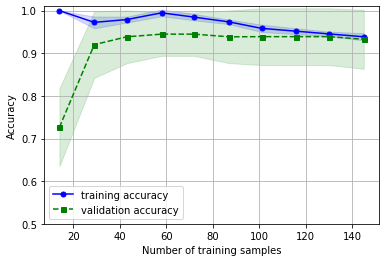


Random Forest - Learning Curve


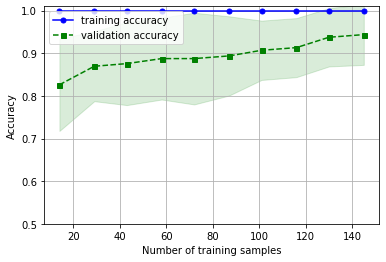

In [18]:
#Plot Learning Curve
print('Logistic Regression - Learning Curve')
plot_learning_curves(pipe_logreg)
print('\nRandom Forest - Learning Curve')
plot_learning_curves(pipe_rdf)

Model Evaluation - Accuracy Score
Logistic Regression 0.95 +/- 0.05
Random Forest 0.95 +/- 0.05




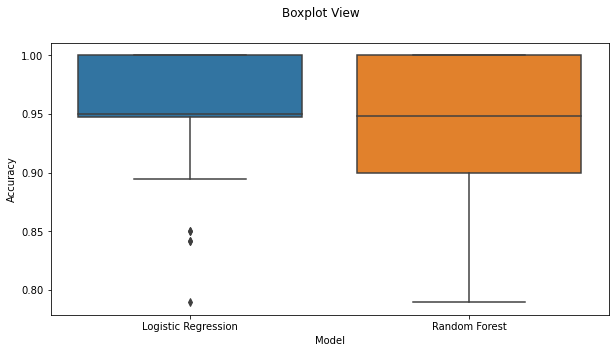

In [19]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Logistic Regression',pipe_logreg))
models.append(('Random Forest',pipe_rdf))

#Model Evaluation
results =[]
names=[]
scoring ='accuracy'
print('Model Evaluation - Accuracy Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x2,Y2,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

#Boxpot View
fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [20]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='accuracy')
    gs_clf = gs_clf.fit(x_train3, y_train_smt)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test3)
    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    target_names=['Outcome 0','Outcome 1','Outcome 2']
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test2,y_pred))  
    print('\n',classification_report(y_test2,y_pred,target_names=target_names)) 

In [21]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)


Optimized Model

Model Name: LogisticRegression(class_weight='balanced', random_state=100)

Best Parameters: {'clf__C': 100, 'clf__penalty': 'l2'}

 [[12  0  0]
 [ 0 13  0]
 [ 0  0 14]]

               precision    recall  f1-score   support

   Outcome 0       1.00      1.00      1.00        12
   Outcome 1       1.00      1.00      1.00        13
   Outcome 2       1.00      1.00      1.00        14

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39


Optimized Model

Model Name: RandomForestClassifier(random_state=100)

Best Parameters: {'clf__bootstrap': True, 'clf__max_features': 'auto', 'clf__n_estimators': 100}

 [[11  1  0]
 [ 1 12  0]
 [ 0  0 14]]

               precision    recall  f1-score   support

   Outcome 0       0.92      0.92      0.92        12
   Outcome 1       0.92      0.92      0.92        13
   Outcome 2       1.00      1.00      1.00        14

  

In [26]:
#Prepare Models 
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression

Model Evaluation - Accuracy
Logistic Regression 0.93 +/- 0.06
Random Forest 0.95 +/- 0.05
Bagging Classifier 0.94 +/- 0.05
AdaBoost 0.90 +/- 0.08
GBC 0.94 +/- 0.06




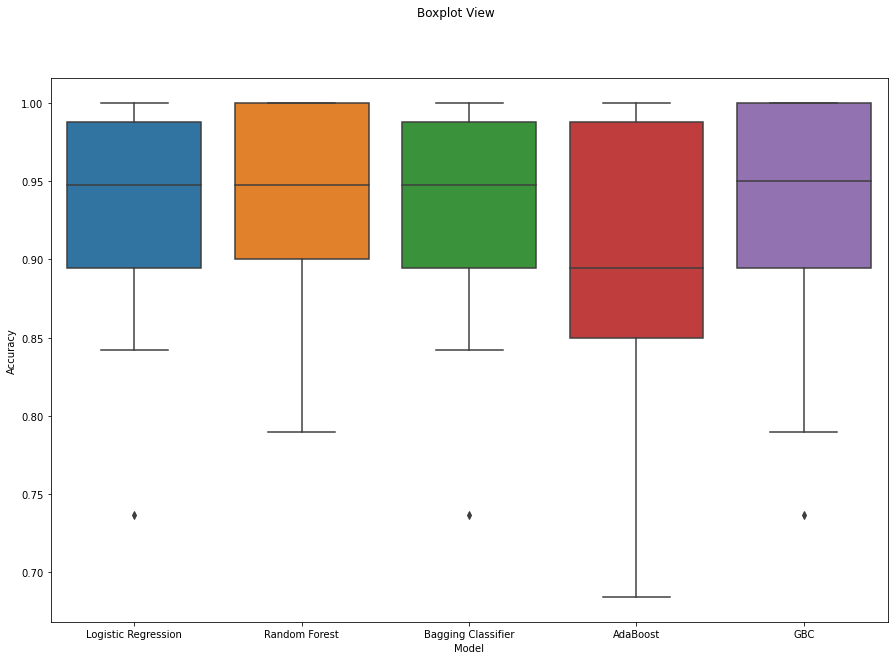

In [27]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Logistic Regression',LogisticRegression(solver='lbfgs',class_weight='balanced',
                                                        random_state=100)))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100,
                                                      random_state=100)))
models.append(('Bagging Classifier',BaggingClassifier(random_state=100)))
models.append(('AdaBoost',AdaBoostClassifier(random_state=100)))
models.append(('GBC',GradientBoostingClassifier(random_state=100)))

#Model Evaluation
results =[]
names=[]
scoring ='accuracy'
print('Model Evaluation - Accuracy')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x2,Y2,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

#Boxpot View
fig = plt.figure(figsize=(15,10))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [28]:
#Script for Models

from sklearn.metrics import classification_report, confusion_matrix  

models2 ={'Logistic Regression':LogisticRegression(solver='lbfgs',
                                                   class_weight='balanced',random_state=100),
          'Random Forest':RandomForestClassifier(n_estimators=100,random_state=100),
          'Bagging Classifier':BaggingClassifier(random_state=100),
          'AdaBoost':AdaBoostClassifier(random_state=100),
          'GBC':GradientBoostingClassifier(random_state=100)}

for name, model in models2.items():
    model.fit(x_train3,y_train_smt)
    predict = model.predict(x_test3)
    print('\nEstimator: {}'.format(name)) 
    print('\n',confusion_matrix(y_test2,predict))  
    print(classification_report(y_test2,predict))  


Estimator: Logistic Regression

 [[12  0  0]
 [ 0 13  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

    Canadian       1.00      1.00      1.00        12
        Kama       1.00      1.00      1.00        13
        Rosa       1.00      1.00      1.00        14

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39


Estimator: Random Forest

 [[11  1  0]
 [ 1 12  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

    Canadian       0.92      0.92      0.92        12
        Kama       0.92      0.92      0.92        13
        Rosa       1.00      1.00      1.00        14

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39


Estimator: Bagging Classifier

 [[11  1  0]
 [ 1 12  0]
 [ 0  0 14]]
              precision    recal

In [29]:
#Create Voting Model - Sklearn
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

estimators = []

model1 = LogisticRegression(solver='lbfgs',class_weight='balanced',
                            random_state=100)
estimators.append(('Logistic', model1))

model2 = RandomForestClassifier(n_estimators=100,random_state=100)
estimators.append(('Random Forest', model2))

voting_clf=VotingClassifier(estimators,voting='soft')

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}
print('\nVoting Model')
for clf in (model1,model2,voting_clf):
    rkfcv= clf.fit(x_train3,y_train_smt)
    ens_rkf1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, Y2, scoring=scoring, cv=ens_rkf1)
    print(clf.__class__.__name__,round(rKFcv['test_rec_macro'].mean(),2))   


Voting Model
LogisticRegression 0.95
RandomForestClassifier 0.94
VotingClassifier 0.95


In [30]:
#Create Stacking Model-Sklearn
from sklearn.ensemble import StackingClassifier

#Identify Models
lr = LogisticRegression(solver='lbfgs',class_weight='balanced',
                        random_state=100)

estimators2 = []

mod1 = RandomForestClassifier(n_estimators=100,random_state=100)
estimators2.append(('Random Forest', mod1))

mod2 = BaggingClassifier(random_state=100)
estimators2.append(('Bagging', mod2))

#Create Stacking Classifier
stackmod=StackingClassifier(estimators=estimators2,
                             final_estimator=lr)

scoring2 = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}

print('\nStacking Model')
for clf in (mod1,mod2,stackmod):
    rkfcv2= clf.fit(x_train3,y_train_smt)
    ens_rkf2 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv2 = cross_validate(rkfcv2, x_2, Y2, scoring=scoring2, cv=ens_rkf2)
    print(clf.__class__.__name__,round(rKFcv2['test_rec_macro'].mean(),2))  


Stacking Model
RandomForestClassifier 0.94
BaggingClassifier 0.93
StackingClassifier 0.93


In [31]:
final_model = RandomForestClassifier(random_state=100, bootstrap= True, max_features= 'auto', n_estimators= 100)
final_model.fit(x_train3, y_train_smt)

RandomForestClassifier(random_state=100)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_final = final_model.predict(x_test3)

# Printing classification report
print('\n', confusion_matrix(y_test2,y_pred_final))
print('\n', classification_report(y_test2,y_pred_final))


 [[11  1  0]
 [ 1 12  0]
 [ 0  0 14]]

               precision    recall  f1-score   support

    Canadian       0.92      0.92      0.92        12
        Kama       0.92      0.92      0.92        13
        Rosa       1.00      1.00      1.00        14

    accuracy                           0.95        39
   macro avg       0.95      0.95      0.95        39
weighted avg       0.95      0.95      0.95        39



In [33]:
# Create a Pickle file  
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(final_model, pickle_out)
pickle_out.close()

In [ ]:
# -*- coding: utf-8 -*-

import numpy as np
import pickle
import pandas as pd
from flask import Flask, request
from flask import Flask, request, jsonify, render_template

app=Flask(__name__)
pickle_in = open("model.pkl","rb")
model=pickle.load(pickle_in)

@app.route('/')
def home():
    return render_template('index.html')



@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [x for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    
    return render_template('index.html', prediction_text='Wheat Kernal is {}'.format(prediction))
    
    


if __name__=='__main__':
    app.run()